# Food Truck Profit Prediction using Linear Regression


Data Preparation

In [ ]:
# Import data from drive
from google.colab import files
uploaded = files.upload()

Saving ex1data1.txt to ex1data1.txt


In [ ]:
# Load text file into a pandas dataframe
import pandas as pd
df = pd.read_csv("ex1data1.txt", sep=",", header=None, names=["Population", "Profit"])
print(df)

    Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


In [ ]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


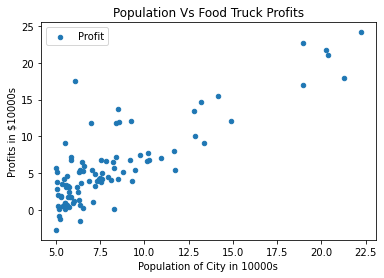

In [ ]:
# Plot the input dataframe
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='Population', y='Profit')
plt.xlabel('Population of City in 10000s')
plt.ylabel('Profits in $10000s')
plt.title('Population Vs Food Truck Profits')
plt.legend(['Profit'])

In [ ]:
# Convert the dataframe into numpy array
import numpy as np
data = df.values
# print(data)

'''
x (ndarray) - (m,n) : matrix of m examples with n features
y (ndarray) - (m,1) : target values
'''
x = np.array(data[:, 0])
y = np.array(data[:, 1])
m = len(x)

# print(x, y)
# print(x.shape)
# print(y.shape)
# print(m)

Applying Batch Gradient Descent 

In [ ]:
# Initializing the fitting parameters
import copy
'''
w (scalar)     : prediction parameter
b (scalar)     : prediction parameter
iters          : number of iterations
alpha          : learning rate
'''
w_int = 0
b_int = 0
iters = 1500
alpha = 0.01

In [ ]:
# Computing the cost fucntion
def Compute_cost(x, y, w, b):
  '''
  J (scalar): cost 
  '''
  w = copy.deepcopy(w)
  J = 0
  delta = ((np.dot(x,w) + b) - y)**2
  for i in range(m):
    J = J + (1/(2*m)) * delta[i]
  J = np.sum(J)
  return J

Compute_cost(x, y, w_int, b_int)

32.072733877455676

In [ ]:
# Computing the Gradient 
def Compute_Gradient(x,y,w,b):
  '''
  dj_dw (scalar) : Gradient of the cost w.r.t parameter w
  dj_db (scalar) : Gradient of the cost w.r.t parameter b 
  '''
  dj_dw = 0
  dj_db = 0
  w = copy.deepcopy(w)

  err = np.dot(x,w) + b - y
  dj_dw = np.sum(np.dot(err,x))/m
  dj_db = np.sum(err)/m

  return dj_dw, dj_db


In [ ]:
# Applying gradient descent
def Gradient_Descent(x, y, w, b, alpha, iters): 
  J_hist = []
  p_hist = np.zeros((iters,2))

  for i in range(iters):
    d_w, d_b = Compute_Gradient(x,y,w,b)
    w = w - alpha * d_w
    b = b - alpha * d_b
    J_hist.append(Compute_cost(x, y, w, b))   
    p_hist[i,0] = w
    p_hist[i,1] = b
    
  return w, b, J_hist, p_hist

w, b, J_hist , p_hist = Gradient_Descent(x, y, w_int, b_int, alpha, iters)

In [ ]:
print(w,b)

1.166362350335582 -3.63029143940436


In [ ]:
# Model prediction

def predict(x, w=w, b=b):
   pred = np.dot(x,w) + b
   return pred

In [ ]:
predict(3.5)

0.4519767867701767

Plotting the Model

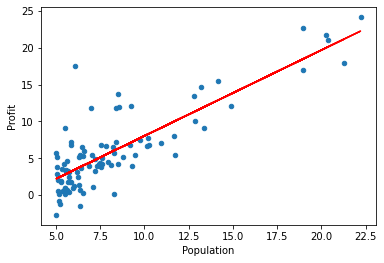

In [ ]:
# Plotting the model

df.plot(kind='scatter', x= 'Population', y= 'Profit')
f = np.dot(x,w) + b
plt.plot(x, f, color='red')

In [ ]:
# Plotting cost vs iteration
def plot_cost_fn(x,y):
  t_b = np.linspace(-10, 10, 100)
  t_w = np.linspace(-1, 4, 100)
  
  J_vals = np.zeros((len(t_b), len(t_w)))
  for i in range(len(t_b)):
    for j in range(len(t_w)):
      J_vals[i][j] = Compute_cost(x,y,t_w[j],t_b[i])

  return J_vals

J_vals = plot_cost_fn(x,y)

Text(0.5, 0, 'J')

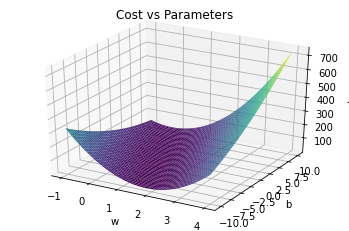

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
t_b = np.linspace(-10, 10, 100)
t_w = np.linspace(-1, 4, 100)
t_w, t_b = np.meshgrid(t_w, t_b)

J_vals = np.transpose(J_vals)
fig = plt.figure()
ax = fig.gca(projection ='3d')
ax.plot_surface(t_w, t_b, J_vals, cmap='viridis')

ax.set_title('Cost vs Parameters')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')

Text(0.09379629152477452, 0.012566320283548628, 'J')

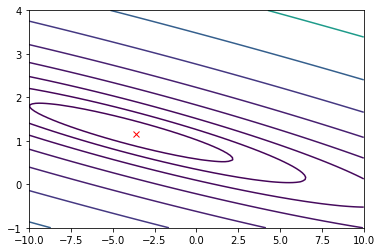

In [ ]:
from matplotlib import ticker, cm
fig, axes = plt.subplots(1, 1)
# axes.contour(t_b, t_w, J_vals, locator=ticker.LogLocator(subs=range(1,10)))
axes.contour(t_b, t_w, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(b,w,'rx')
ax.set_title('Contour')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J')